In [ ]:
#import numpy as np
import matplotlib.pyplot as plt
import autograd.numpy as np
from autograd import jacobian

: 

In [ ]:
conda install -n base ipykernel --update-deps --force-reinstall

: 

In [130]:
l0 = 10
eps = 1e-16
w = np.ones(4)
w = np.diag(w)
def equation_system(x):
    eq1 = (- 0 -(2* x[0] + 4*x[0]*x[1] +2*x[1] + x[2]) )#/(x[0] + x[1]**-1 -x[2]**2)
    eq2 = (0 - (4*x[0] + 2*x[1] -3*x[0]*x[2]))#/(6*x[0] + anp.sin(x[1])*x[2])
    eq3 = (1- (x[0]*(x[2]) + 2*x[1]))
    eq4 = 2 - (x[0]**-1 + x[3] + x[3]**2) #/ (x[0]*x[2] + 2*x[1])
    return np.array([eq1, eq2,eq3,eq4])
def y(x):
    y1 = (2* x[0] + 4*x[0]*x[1] +2*x[1] + x[2])
    y2 = (4*x[0] + 2*x[1] -3*x[0]*x[2])
    y3 = x[0]*(x[2]) + 2*x[1]
    y4 = (x[0]**-1 + x[3] + x[3]**2)
    return np.array([y1,y2,y3,y4])
J = jacobian(equation_system)
x0 = np.array([1.0, 0.0001, 0.000001,1.0])

def h(J,w,cost,x,l0=l0):
    h = np.linalg.pinv(
        J.T @ w @ J
                        + l0 * np.diag(np.diag(J.T@ w @ J))) @ J.T @ w @ cost(x) 
    return h
print(J(x0).shape)
hlm = h(J(x0),w, equation_system,x0)

def rho(J,x,h,w,cost):
    rho =  (cost(x).T @ w @ cost(x) - cost(x+h).T@w@cost(x+h) )/np.abs(h.T@ (l0 * w @h + J.T @ w @ cost(x)  ))
    return rho

print("Yx0: ",y(x0).shape)
rho(J(x0),x0,hlm,w, equation_system)

#equation_system(x0).T @ w @ equation_system(x0)

(4, 4)
Yx0:  (4,)


np.float64(-2.1288674315105305)

In [131]:
def levenberg_marquardt(x0, w, cost,y, l0 = l0, eps = eps, max_iter = 10000):
    x = x0.copy()
    for i in range(max_iter):
        
        J = jacobian(y)
        hlm = h(J(x), w, cost, x, l0 = l0)
        rho_value = rho(J(x),x, hlm, w, cost)
        print(f"rho value:", rho_value, "h value = ", hlm, "l0 = ", l0)
        if rho_value > 0.0000001:
            x = x + hlm
            l0 /= 10
            l0 = np.maximum(l0, 10e-7)# Decrease damping factor
        else:
            l0 *= 10
            l0 = np.minimum(l0, 10e7)# Increase damping factor
        if np.linalg.norm(hlm) < eps:
            break

    return x

In [132]:
levenberg_marquardt_result = levenberg_marquardt(x0, w, equation_system, y)
levenberg_marquardt_result

rho value: 1.7014365089568013 h value =  [-0.07601339 -0.03440979  0.08519426 -0.03260647] l0 =  10
rho value: 0.9665112000107168 h value =  [-0.27023804 -0.12920207  0.34365688 -0.22182882] l0 =  1.0
rho value: 0.4502106238825628 h value =  [-0.09876393 -0.15368321  0.42794207 -0.38761506] l0 =  0.1
rho value: -0.9096324982890727 h value =  [ 1.24765604 -0.44043693  0.63693554  2.17118917] l0 =  0.01
rho value: 0.27549085186644046 h value =  [ 0.23849056 -0.09917969  0.16887932  0.25768133] l0 =  0.1
rho value: -0.11162250841234818 h value =  [ 1.11487109 -0.19537181  0.22677666  0.67263871] l0 =  0.01
rho value: 0.1412715129374748 h value =  [ 0.64560121 -0.10497822  0.1243749   0.31392706] l0 =  0.1
rho value: 0.26333033033109354 h value =  [ 0.33616986  0.00729474 -0.01168336 -0.11296132] l0 =  0.01
rho value: 0.4279281476041904 h value =  [ 0.00553651 -0.00133235  0.00202668 -0.01706192] l0 =  0.001
rho value: 0.40130287030194844 h value =  [-6.37491539e-06  2.39209075e-06 -3.5493

array([ 1.78077641, -0.5153882 ,  1.1403882 ,  0.79940263])

In [133]:
equation_system(levenberg_marquardt_result)

array([ 0.00000000e+00, -8.88178420e-16,  2.22044605e-16,  0.00000000e+00])

In [88]:



import matplotlib.pyplot as plt


In [203]:
px = 15
py = 9
#c = 6
c = px*py - 4
ty = 11
tx = 15
Ly = 1
Lx = 10
epsx = Ly/(2*py)
epsy = Ly/(2*py)

N = (px-2)*(py - 2)
M_4x = px - 2
M_4y = py - 2
M = 2* M_4x + 2* M_4y
a = 2
b = 1
beta = Lx/Ly


weightss = 0*np.zeros(2*(N+M))#np.random.rand((2*(N+M)),1).reshape(-1)/(2*(N+M))
weights3 = 1*np.random.rand(3*(N+M),1).reshape(-1,1)/(1*(N+M))
#weights3 = np.ones_like(weights)
#wx = weights3[:(N+M)].reshape(-1,1)
#wy = weights3[(N+M):2*(N+M)].reshape(-1,1)
#wp = weights3[2*(N+M):3*(N+M)].reshape(-1,1)
#weights3 /= np.sum(weights3)
#rho = 1.0
mu = 1.0
vm = 1.0
Re = 1.0#Ly*vm*rho/mu
pm = 10
Eu = 1 #pm /(rho*vm**2) 
#weights3[:2*(N+M)] = resultado2.x.reshape(-1,1)
N+M
Re
weightss.shape

(262,)

In [204]:
def euclidian_distance(x,y,xyk,c):
    matrix = np.zeros([len(x)*len(y) ,c])
    number_matrix = np.zeros([len(x)*len(y),2])
    for i in range(0,len(x)):
        for j in range(0,len(y)):
            n = i
            m = j + i*len(y)
            matrix[m,:] = np.sqrt(np.square(x[n]- xyk[:,0])  + np.square(y[j] - xyk[:,1])) + (2.2250738585072014e-308)**(1/(2*a))
            number_matrix[m,0] = x[n]
            number_matrix[m,1] = y[j]
    return matrix, number_matrix

def points(x,y):
    matrix = np.zeros([len(x)*len(y),2])
    boundary = np.zeros([2*len(y)-4 + 2 * len(x),2])
    interior = np.zeros([(len(x) - 2) * (len(y)-2),2])
    h, u = 0,0
    for i in range(0,len(x)):
        for j in range(0,len(y)):
            n = i#%len(x)
            m = j + i*len(y)
            matrix[m,0] = x[n]
            matrix[m,1] = y[j]
        
            if n == 0 or n == len(x)-1 or j == 0 or j == len(y)-1:
                
                boundary[h,0] = x[n]
                boundary[h,1] = y[j]
                h+=1
            else:
                interior[u,0] = x[n]
            
                interior[u,1] = y[j]
                u+=1
    return matrix, boundary, interior

In [205]:
x = np.linspace(0,Lx,px)
y = np.linspace(0,Ly,py)

X,Y = np.meshgrid(x,y)

#Puntos internos

x_int = np.linspace(epsx,Lx - epsx,px-2)
y_int =  np.linspace(epsy,Ly - epsy,py-2)
Xin,Yin = np.meshgrid(x_int,y_int)

#Puntos en las fronteras:
xf1, yf1 = (x_int, np.zeros(1)) # f(x,0) 
X1,Y1 = np.meshgrid(xf1 , yf1)
xf2,yf2 = (x_int, np.ones(1)*Ly) # f(x,L)
X2,Y2 = np.meshgrid(xf2 , yf2)
xf3,yf3 = (np.zeros(1), y_int ) #f(0,y)
X3,Y3 = np.meshgrid(xf3 , yf3)
xf4,yf4 = (np.ones(1)*Lx,y_int) #f(L,y)
X4,Y4 = np.meshgrid(xf4,yf4)

#Centros


xk = points(x_int,y_int)[0][:,0].reshape(-1,1)
yk = points(x_int,y_int)[0][:,1].reshape(-1,1)

xyk1 = np.concatenate((xk,yk),axis = 1)
xykf1 = np.concatenate((xf1.reshape(-1,1), np.zeros_like(xf1).reshape(-1,1)),axis = 1)
xykf2 = np.concatenate((xf2.reshape(-1,1), np.ones_like(xf2).reshape(-1,1)*Ly),axis = 1)
xykf3 = np.concatenate((np.zeros_like(yf3).reshape(-1,1),yf3.reshape(-1,1)),axis = 1)
xykf4 = np.concatenate((np.ones_like(yf4).reshape(-1,1)*Lx,yf4.reshape(-1,1)),axis = 1)
xyk1 = np.concatenate((xyk1,xykf1,xykf2,xykf3,xykf4),axis = 0)

#Puntos test
x_test = np.linspace(0,Lx,tx)
y_test = np.linspace(0,Ly,ty)
Xt,Yt = np.meshgrid(x_test,y_test)
x_vector = points(x_int,y_int)[0][:,0].reshape(-1,1)
y_vector = points(x_int,y_int)[0][:,1].reshape(-1,1)
x_vector.shape
x_v2 = euclidian_distance(x,y,xyk1,c)


x_vector.shape

(91, 1)

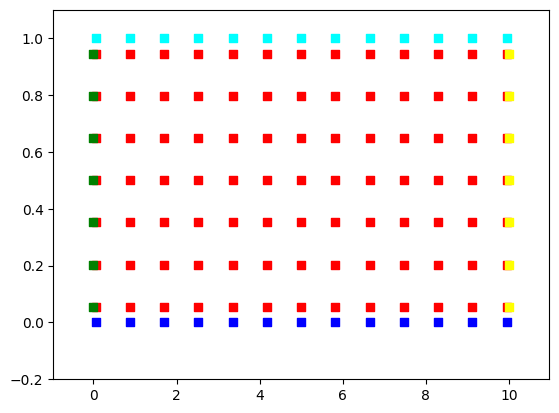

In [206]:
#Plot the colocation points
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([-0.3 - Lx/px,Lx + Lx/px + 0.3 ])
ax.set_ylim([-0.2,Ly*1.1])
ax.scatter(Xin,Yin,marker='s', color='red')
ax.scatter(X1,Y1,marker='s', color = 'blue')

ax.scatter(X2,Y2,marker='s', color = 'cyan')
ax.scatter(X3,Y3,marker='s', color = 'green')
ax.scatter(X4,Y4,marker = 's' ,color = 'yellow')
#ax.scatter(xyk1[:,0],xyk1[:,1], color = 'black')
plt.show()

In [207]:
def tps_rbf(euclidian_distance,a=a,b=b):
    #if euclidian_distance == 0:
    #    return 0
    #else:
    return (euclidian_distance*b)**(2*a) *np.log(b*euclidian_distance) #euclidian_distance + 1e-10 to avoid singularity at zero
def tpsdx(x_vector,euclidian_distance,a=a,b=b):
        return (x_vector.reshape(-1,1) - xyk1[:,0].reshape(1,-1))/euclidian_distance * (b)**(2*a) *euclidian_distance**(2*a-1)*(2*a*np.log(b*euclidian_distance) + 1)# #euclidian_distance + 1e-10 to avoid singularity at zero  
    
def tpsdy(y_vector,euclidian_distance,a=a,b=b):
        return (b)**(2*a) *euclidian_distance**(2*a-1)*(2*a*np.log(b*euclidian_distance) + 1) /(euclidian_distance) * (y_vector.reshape(-1,1) - xyk1[:,1].reshape(1,-1)) #euclidian_distance + 1e-10 to avoid singularity at zero
def tpsdxx(x_vector,euclidian_distance,a=a,b=b):
        return ((euclidian_distance**2 - (x_vector.reshape(-1,1) - xyk1[:,0].reshape(1,-1))**2)/euclidian_distance**3 * (b)**(2*a) *euclidian_distance**(2*a-1)*(2*a*np.log(b*euclidian_distance) + 1)
                        + ((x_vector.reshape(-1,1) - xyk1[:,0].reshape(1,-1))/euclidian_distance) **2 * b**(2*a) *euclidian_distance**(2*a-2) *((2*a-1)* (2*a*np.log(b*euclidian_distance) + 1) + 2*a))

def tpsdyy(y_vector,euclidian_distance,a=a,b=b):
        return ((euclidian_distance**2 - (y_vector.reshape(-1,1) - xyk1[:,1].reshape(1,-1))**2)/euclidian_distance**3 * (b)**(2*a) *euclidian_distance**(2*a-1)*(2*a*np.log(b*euclidian_distance ) + 1)
                        + ((y_vector.reshape(-1,1) - xyk1[:,1].reshape(1,-1))/euclidian_distance) **2 * b**(2*a) *euclidian_distance**(2*a-2) *((2*a-1)* (2*a*np.log(b*euclidian_distance) +1) +2*a))
  

In [208]:
euclidian_dist_complete = euclidian_distance(x,y,xyk1,c)[0]
euclidian_dist_int = euclidian_distance(x_int,y_int,xyk1,c)[0]
euclidian_dist_centers = euclidian_distance(xyk1[:,0],xyk1[:,1],xyk1,c)[0]



euclidian_dist_border1 = euclidian_distance(xf1,yf1,xyk1,c)[0]
euclidian_dist_border2 = euclidian_distance(xf2,yf2,xyk1,c)[0]
euclidian_dist_border3 = euclidian_distance(xf3,yf3,xyk1,c)[0]
euclidian_dist_border4 = euclidian_distance(xf4,yf4,xyk1,c)[0]

euclidian_dist_test = euclidian_distance(x_test,y_test,xyk1,c)[0]
euclidian_dist_border3.shape

(7, 131)

In [209]:
x_vector_int = euclidian_distance(x_int,y_int,xyk1,c)[1][:,0]
y_vector_int = euclidian_distance(x_int,y_int,xyk1,c)[1][:,1]

In [210]:
gxx_int = (tpsdxx(x_vector_int,euclidian_dist_int)) 
gyy_int =  (tpsdyy(y_vector_int,euclidian_dist_int)) 
gx_int = (tpsdx(x_vector_int,euclidian_dist_int)) 
gy_int = tpsdy(y_vector_int,euclidian_dist_int)
g_int = tps_rbf(euclidian_dist_int)
gx_b4 = tpsdx(np.ones_like(yf4)*Lx,euclidian_dist_border4 )
gy_b4 = tpsdy(yf4,euclidian_dist_border4)
gxx_b4 = tpsdxx(np.ones_like(yf4)*Lx,euclidian_dist_border4)
gyy_b4 = tpsdyy(yf4,euclidian_dist_border4)
gb2 = tps_rbf(euclidian_dist_border2)

gb3 = tps_rbf(euclidian_dist_border3)
gxx_b3 = tpsdxx(np.zeros_like(yf3),euclidian_dist_border3)
gyy_b3 = tpsdyy(yf3,euclidian_dist_border3)
gx_b3 = tpsdx(np.zeros_like(yf3),euclidian_dist_border3)
gy_b3 = tpsdy(yf3,euclidian_dist_border3)

gb1 = tps_rbf(euclidian_dist_border1)
gb4 = tps_rbf(euclidian_dist_border4)

gxx_b2 = tpsdxx(xf2,euclidian_dist_border2)
gxx_b1 = tpsdxx(xf1,euclidian_dist_border1)
gyy_b2 = tpsdyy(np.ones_like(xf2)*Ly,euclidian_dist_border2)
gyy_b1 = tpsdyy(np.zeros_like(xf1),euclidian_dist_border1)

gy_b2 = tpsdy(np.ones_like(xf2)*Ly,euclidian_dist_border2)
gy_b1 = tpsdy(np.zeros_like(xf1),euclidian_dist_border1)


print(gb1.shape)

(13, 131)


In [211]:
phidphidx = np.array([(g_int[i,:].reshape(-1,1) @ gx_int[i,:].reshape(-1,1).T).reshape(-1) for i in range(len(g_int))])
phidphidy = np.array([(g_int[i,:].reshape(-1,1) @ gy_int[i,:].reshape(-1,1).T).reshape(-1) for i in range(len(g_int))])

phidphidx_b3 = np.array([(gb3[i,:].reshape(-1,1) @ gx_b3[i,:].reshape(-1,1).T).reshape(-1) for i in range(len(gb3))])
phidphidy_b3 = np.array([(gb3[i,:].reshape(-1,1) @ gy_b3[i,:].reshape(-1,1).T).reshape(-1) for i in range(len(gb3))])
phidphidx_b4 = np.array([(gb4[i,:].reshape(-1,1) @ gx_b4[i,:].reshape(-1,1).T).reshape(-1) for i in range(len(gb4))])
phidphidy_b4 = np.array([(gb4[i,:].reshape(-1,1) @ gy_b4[i,:].reshape(-1,1).T).reshape(-1) for i in range(len(gb4))])

#phidphidy_b4.shape


In [212]:
def NavierStokess_cost(weightss):
    #print('Re = ',Re)
    wx = weightss[:((N+M))].reshape(-1,1)
    wy = weightss[((N+M)):2*((N+M))].reshape(-1,1)
    
    wxiwxj = (wx @ wx.T).T.flatten().reshape(-1,1)
    wyiwyj = (wy @ wy.T).T.flatten().reshape(-1,1)
    wxiwyj = (wx @ wy.T).T.flatten().reshape(-1,1)
    wyiwxj = (wy @ wx.T).T.flatten().reshape(-1,1)
    

    
    #Ecuaiones diferenciales en puntos internos
    #Ecuacion en x
    F_intx =  ( 1/Re*(-1/beta**2*(gxx_int@wx) - (gyy_int@wx))  
                       + (phidphidx@wxiwxj)/beta + (phidphidy@wyiwxj) + (-pm)/beta )
    
        #   Ecuacione en y
    F_inty = ( 1/Re*(-1/beta**2*(gxx_int@wy) - (gyy_int@wy)) 
                   + 0 + (phidphidx @ wxiwyj)/beta + (phidphidy@wyiwyj)
                   )
        #Ecuacion de continuidad8u9
    F_intc = ((gx_int@wx)/beta + (gy_int@wy))


    #Ecuaciones diferenciales en las fronteras
        #Ecuaciones en frontera de salida  
    F_b4c = ((gx_b4@wx)/beta + (gy_b4@wy))
    F_b3c = ((gx_b3@wx)/beta + (gy_b3 @wy))
    F_b4x = ( 1/Re*(-1/beta**2*(gxx_b4 @ wx) - (gyy_b4@wx))
                    + (phidphidx_b4@wxiwxj)/beta + (phidphidy_b4@wyiwxj) + 1*(-pm)/beta)
    
    F_b3x = ( 1/Re*(-1/beta**2*(gxx_b3@wx) - (gyy_b3@wx)) 
         + (phidphidx_b3@wxiwxj)/beta + (phidphidy_b3@wyiwxj) + 1*(-pm)/beta)
    F_b4y = ( 1/Re*(-1/beta**2*(gxx_b4@wy) - (gyy_b4@wy)) 
       + (phidphidx_b4@wxiwyj)/beta + (phidphidy_b4@wyiwyj) )
    F_b3y = ( 1/Re*(-1/beta**2*(gxx_b3 @ wy) - (gyy_b3@wy)) 
                           + (phidphidx_b3@wxiwyj)/beta + (phidphidy_b3@wyiwyj))
        #Condiciones de frontera
    
        # Condiciones de ux
    F_b2x = 1*( ( gb2 @ wx ) )
    F_b1x= 1*((gb1@wx))
    
    
        #Condiciones de uy
    F_b2y = 1*((gb2@wy))
    F_b1y  = 1*((gb1@wy))        
    
    return np.reshape(np.concatenate([F_intx,F_inty,F_intc,F_b4c,F_b4x,F_b4y,F_b3c,
                                      F_b3x,F_b3y,F_b2x,F_b2y,F_b1x,F_b1y]),-1)#np.concatenate([F,reg*weightss.reshape(-1) ]) #,F.shape
    
def NavierStokess_system(weightss):
    #print('Re = ',Re)
    wx = weightss[:((N+M))].reshape(-1,1)
    wy = weightss[((N+M)):2*((N+M))].reshape(-1,1)
    
    wxiwxj = (wx @ wx.T).T.flatten().reshape(-1,1)
    wyiwyj = (wy @ wy.T).T.flatten().reshape(-1,1)
    wxiwyj = (wx @ wy.T).T.flatten().reshape(-1,1)
    wyiwxj = (wy @ wx.T).T.flatten().reshape(-1,1)
    
    
    
    #Ecuaiones diferenciales en puntos internos
    #Ecuacion en x
    F_intx =  ( 1/Re*(-1/beta**2*(gxx_int@wx) - (gyy_int@wx))  
                       + (phidphidx@wxiwxj)/beta + (phidphidy@wyiwxj))
        #   Ecuacione en y
    F_inty = ( 1/Re*(-1/beta**2*(gxx_int@wy) - (gyy_int@wy)) 
                   + 0 + (phidphidx @ wxiwyj)/beta + (phidphidy@wyiwyj)
                   ) 
        #Ecuacion de continuidad
    F_intc = ((gx_int@wx)/beta + (gy_int@wy))#/F_03.mean()


    #Ecuaciones diferenciales en las fronteras
        #Ecuaciones en frontera de salida  
    F_b4c = ((gx_b4@wx)/beta + (gy_b4@wy))
    F_b3c = ((gx_b3@wx)/beta + (gy_b3 @wy))
    F_b4x = ( 1/Re*(-1/beta**2*(gxx_b4 @ wx) - (gyy_b4@wx))
                    + (phidphidx_b4@wxiwxj)/beta + (phidphidy_b4@wyiwxj))
                                                                                
    F_b3x = ( 1/Re*(-1/beta**2*(gxx_b3@wx) - (gyy_b3@wx)) 
         + (phidphidx_b3@wxiwxj)/beta + (phidphidy_b3@wyiwxj))
    F_b4y = ( 1/Re*(-1/beta**2*(gxx_b4@wy) - (gyy_b4@wy)) 
       + (phidphidx_b4@wxiwyj)/beta + (phidphidy_b4@wyiwyj) )
    F_b3y = ( 1/Re*(-1/beta**2*(gxx_b3 @ wy) - (gyy_b3@wy)) 
                           + (phidphidx_b3@wxiwyj)/beta + (phidphidy_b3@wyiwyj))
        #Condiciones de frontera
    
        # Condiciones de ux
    F_b2x = 1*( ( gb2 @ wx ) )
    F_b1x= 1*((gb1@wx))
    
    
        #Condiciones de uy
    F_b2y = 1*((gb2@wy))
    F_b1y  = 1*((gb1@wy))    
    
    return -1*np.reshape(np.concatenate([F_intx,F_inty,F_intc,F_b4c,F_b4x,F_b4y,F_b3c,
                                      F_b3x,F_b3y,F_b2x,F_b2y,F_b1x,F_b1y]),-1)#np.concatenate([F,reg*weightss.reshape(-1) ]) #,F.shape
    
    

In [213]:
l0 = 10
eps = 1e-8




def h(J,w,cost,x,l0=l0):
    h = np.linalg.pinv(
        J.T @ w @ J
                        + l0 * np.diag(np.diag(J.T@ w @ J))) @ J.T @ w @ cost(x) 
    return h



def rho(J,x,h,w,win, cost):
    rho =  (cost(x).T @ w @ cost(x) - cost(x+h).T@w@cost(x+h) )/np.abs(h.T@ (l0 * win @h + J.T @ w @ cost(x)  ))
    return rho

def levenberg_marquardt(x0, w, cost,y,win, l0 = l0, eps = eps, max_iter = 50):
    x = x0.copy()
    for i in range(max_iter):
        
        J = jacobian(y)
        hlm = h(J(x), w, cost, x, l0 = l0)
        rho_value = rho(J(x),x, hlm, w,win, cost)
        print( f"rho value:", rho_value,"hlm : ", np.linalg.norm(hlm),"cost: ",np.linalg.norm(cost(x)),  "l0 = ", l0)
        if rho_value > 1.0:
            x = x + hlm
            l0 /= 10
            l0 = np.maximum(l0, 10e-7)# Decrease damping factor
        else:
            l0 *= 10
            l0 = np.minimum(l0, 10e7)# Increase damping factor
        if np.linalg.norm(hlm) < eps:
            break

    return x


weightss = np.array(0*np.random.rand((2*(N+M)),1).reshape(-1)/(2*(N+M)))
wns = np.ones(NavierStokess_cost(weightss).shape[0],).reshape(-1)
wns = np.diag(wns)
win = np.diag(np.ones_like(weightss))
print(NavierStokess_cost(weightss).shape[0])
NavierStokess_system(weightss).shape
J = jacobian(NavierStokess_system)(weightss)

hlm = h(J,wns, NavierStokess_cost,weightss)
rho_value = rho(J,weightss, hlm, wns,win, NavierStokess_cost)
#a(np.array(weightss))#.shape
#levenberg_marquardt_result = levenberg_marquardt(weightss,wns , NavierStokess_cost, NavierStokess_system,win)

367


In [219]:
Re = 200
levenberg_marquardt_result = levenberg_marquardt(weightss,wns , NavierStokess_cost, NavierStokess_system,win)

rho value: 1.558592150713186 hlm :  1.3790092735566808e-06 cost:  10.246950765959598 l0 =  10
rho value: 1.8977912654121127 hlm :  6.846266374597376e-06 cost:  10.246929724146359 l0 =  1.0
rho value: 2.8063614945883937 hlm :  2.2955498625612997e-05 cost:  10.246836573228762 l0 =  0.1
rho value: 2.8719610610301345 hlm :  0.00012757721727454886 cost:  10.246443635807193 l0 =  0.01
rho value: 3.132560969000258 hlm :  0.0006323439092683876 cost:  10.244161537804628 l0 =  0.001
rho value: 2.8247225707337353 hlm :  0.004893342285771992 cost:  10.2306491312015 l0 =  0.0001
rho value: 2.0504919304455798 hlm :  0.011974076748525977 cost:  10.159391315908353 l0 =  1e-05
rho value: 1.1435266534576638 hlm :  0.033809257410673324 cost:  9.975359174157006 l0 =  1.0000000000000002e-06
rho value: 0.425464928161918 hlm :  0.11716226937257217 cost:  9.823608647799151 l0 =  1e-06
rho value: 0.4975578058326331 hlm :  0.014566983514579674 cost:  9.823608647799151 l0 =  9.999999999999999e-06
rho value: 0.48

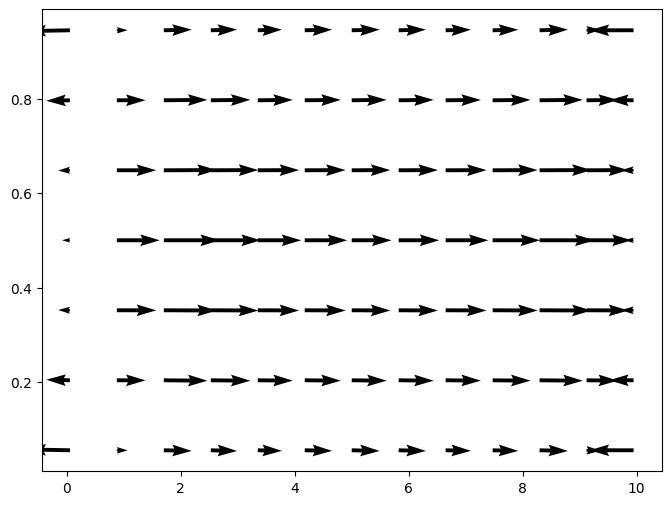

In [220]:
ux =  beta*tps_rbf(euclidian_dist_int) @ levenberg_marquardt_result[:(N+M)]
uy = tps_rbf(euclidian_dist_int)@ levenberg_marquardt_result[(N+M):2*(N+M)]
ux
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.quiver(Xin, Yin, ux.reshape(px-2,py-2).T, uy.reshape(px-2,py-2).T)

np.float64(17.586014045004347)

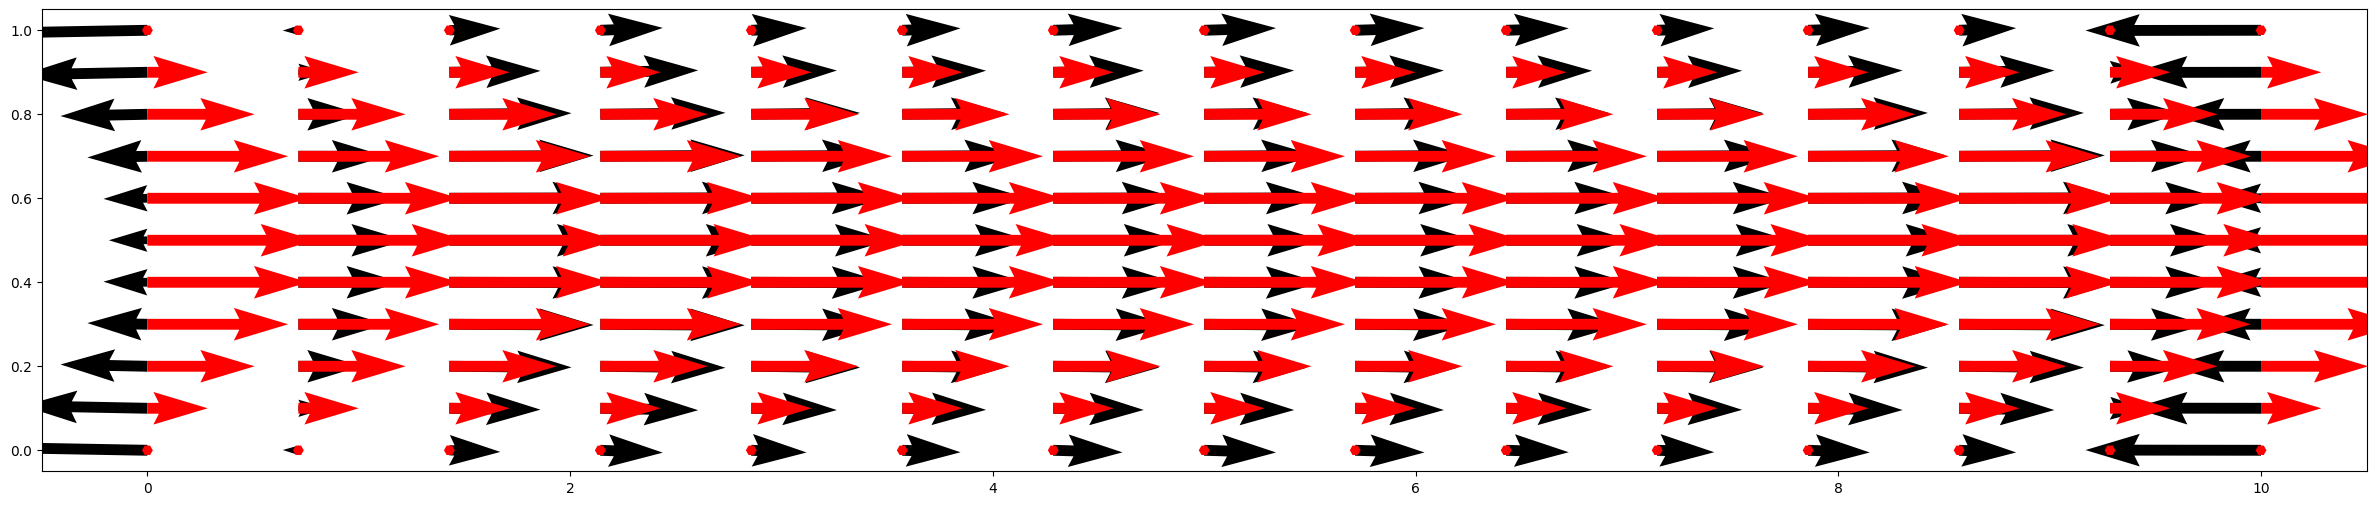

In [221]:
ux2 = beta*tps_rbf(euclidian_dist_test) @ levenberg_marquardt_result[:N+M]
uy2 = tps_rbf(euclidian_dist_test) @ levenberg_marquardt_result[N+M:2*(N+M)]
#p3 = tps_rbf(euclidian_dist_test) @ resultado3.x[2*(N+M):3*(N+M)]
#print(np.max(uy2))
fig, ax = plt.subplots(1, 1, figsize=(30,6))
ax.quiver(Xt, Yt, ux2.reshape(tx,ty).T, uy2.reshape(tx,ty).T)
ax.quiver(Xt, Yt, -pm/2*Re*(Yt**2 - Ly*Yt), 0, color = 'red')
np.max(ux2)

ERROR Medio: 93.01928115022756 %
Error Maximo 94.50113115214788 %
V numérico maximo 13.747172119630306
V analitico maximo 250.0
Error medio total 92.94610903921294 %


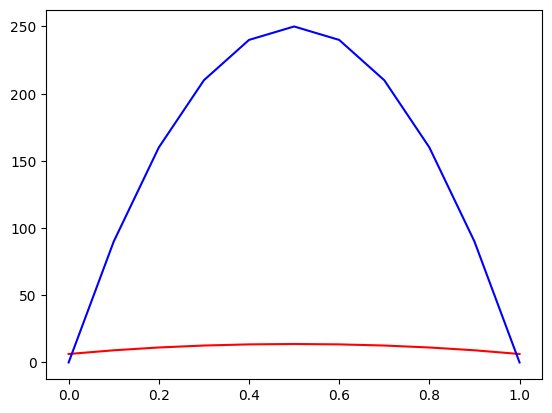

In [224]:
ppp = 5
print("ERROR Medio:",np.mean( np.abs((ux2.reshape(tx,ty).T[1:-1,ppp] - (-5*Re*(y_test**2 - Ly*y_test))[1:-1] ) /(-5*Re*(y_test**2 - Ly*y_test)   )[1:-1]  ) ) *100,'%')
print("Error Maximo", np.max( np.abs((ux2.reshape(tx,ty).T[1:-1,ppp] - (-5*Re*(y_test**2 - Ly*y_test))[1:-1] ) /(-5*Re*(y_test**2 - Ly*y_test)   )[1:-1]  ) ) *100,'%')
print("V numérico maximo", np.max(ux2.reshape(tx,ty).T[1:-1,ppp]))
print("V analitico maximo", np.max(-Re*pm/2*(y_test**2 - Ly*y_test)[1:-1]))
e = np.mean([np.mean( np.abs((ux2.reshape(tx,ty).T[1:-1,i] - (-pm/2*Re*(y_test**2 - Ly*y_test))[1:-1] ) /(-pm/2*Re*(y_test**2 - Ly*y_test)   )[1:-1]  ) ) *100 for i in range(1,ty-1)])
print("Error medio total",e, "%")
plt.plot(y_test,ux2.reshape(tx,ty).T[:,ppp] , color = 'red')
plt.plot(y_test,-Re*pm/2*(y_test**2 - Ly*y_test), color = 'blue')

In [166]:
l0 = 10
eps = 1e-8
w = np.ones(2)
w = np.diag(w)
def equation_system(x):
    eq1 = (- 0 -(2* x[0] + 4*x[0]*x[1] +2*x[1] + x[2]) )#/(x[0] + x[1]**-1 -x[2]**2)
    eq2 = (0 - (4*x[0] + 2*x[1] -3*x[0]*x[2]))#/(6*x[0] + anp.sin(x[1])*x[2])
    #eq3 = (1- (x[0]*(x[2]) + 2*x[1]))
    #eq4 = 2 - (x[0]**-1 + x[1] + x[2]**2) #/ (x[0]*x[2] + 2*x[1])
    return np.array([eq1, eq2])
def y(x):
    y1 = (2* x[0] + 4*x[0]*x[1] +2*x[1] + x[2])
    y2 = (4*x[0] + 2*x[1] -3*x[0]*x[2])
    #y3 = x[0]*(x[2]) + 2*x[1]
   # y4 = (anp.exp(-x[0]**2) + x[1]*x[2]**2)
    return np.array([y1,y2])
J = jacobian(equation_system)
x0 = np.array([1.0, 0.0001, 0.000001])

def h(J,w,cost,x,l0=l0):
    h = np.linalg.pinv(
        J.T @ w @ J
                        + l0 * np.diag(np.diag(J.T@ w @ J))) @ J.T @ w @ cost(x) 
    return h
print(J(x0).shape)
hlm = h(J(x0),w, equation_system,x0)

def rho(J,x,h,w,win, cost):
    rho =  (cost(x).T @ w @ cost(x) - cost(x+h).T@w@cost(x+h) )/np.abs(h.T@ (l0 * win @h + J.T @ w @ cost(x)  ))
    return rho

print("Yx0: ",y(x0).shape)
win = np.ones_like(x0)
win = np.diag(win)
win.shape
rho(J(x0),x0,hlm,w,win, equation_system)

#equation_system(x0).T @ w @ equation_system(x0)
#J(x0).shape

(2, 3)
Yx0:  (2,)


np.float64(-2.1441380931434875)

In [167]:
def levenberg_marquardt(x0, w, cost,y,win, l0 = l0, eps = eps, max_iter = 10000):
    x = x0.copy()
    for i in range(max_iter):
        
        J = jacobian(y)
        hlm = h(J(x), w, cost, x, l0 = l0)
        rho_value = rho(J(x),x, hlm, w,win, cost)
        print( f"rho value:", rho_value,"Hlm value: ", np.linalg.norm(hlm),  "l0 = ", l0)
        if rho_value > 2:
            x = x + hlm
            l0 /= 10
            l0 = np.maximum(l0, 10e-7)# Decrease damping factor
        else:
            l0 *= 10
            l0 = np.minimum(l0, 10e7)# Increase damping factor
        if np.linalg.norm(hlm) < eps:
            break

    return x

In [20]:
levenberg_marquardt_result = levenberg_marquardt(x0, w, equation_system, y)
levenberg_marquardt_result

rho value: 1.6980028195317498 h value =  [-0.08333834 -0.04167508  0.0833331 ] l0 =  10
rho value: 1.021316795211639 h value =  [-0.30054436 -0.15101419  0.29315447] l0 =  1.0
rho value: 0.6902393263171311 h value =  [-0.24736519 -0.13199184  0.18549829] l0 =  0.1
rho value: 0.615550798575967 h value =  [-5.50570431e-02 -3.78979271e-02 -8.73317627e-05] l0 =  0.01
rho value: 0.332354042185172 h value =  [-0.00065249 -0.00160234 -0.00391861] l0 =  0.001
rho value: 0.22919794932520543 h value =  [ 1.36384230e-06 -1.34875329e-06 -7.80152951e-06] l0 =  0.0001
rho value: 0.23248118293633915 h value =  [ 8.43748015e-11 -1.18178212e-10 -6.00468132e-10] l0 =  1e-05
rho value: 0.2359883673383524 h value =  [ 5.60841874e-16 -1.03259021e-15 -4.82932463e-15] l0 =  1.0000000000000002e-06
rho value: 0.33174431893671186 h value =  [ 5.72733007e-17  3.24173054e-17 -2.55422656e-17] l0 =  1e-06


array([ 0.31304394, -0.36408272,  0.55797312])

In [21]:
equation_system(levenberg_marquardt_result)

array([-1.11022302e-16, -1.11022302e-16])